In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [275]:
df = pd.read_csv("D:/Studia/Semestr 4/ML/ML_Project_1/data/learning_data.csv")

**INFO** \
This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.

In [276]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran West Side,Co-op for sale,415000,3,1.0,2184.207862,233 E 70th St Apt 6R,"New York, NY 10021","233 E 70th St Apt 6RNew York, NY 10021",New York,New York County,New York,Manhattan,233,"233 E 70th St #6r, New York, NY 10021, USA",40.767820,-73.959425
1,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,5,5.0,2184.207862,42-11 Astoria Blvd N,"Astoria, NY 11105","42-11 Astoria Blvd NAstoria, NY 11105",United States,New York,Queens County,Queens,Astoria Boulevard North,"42-11 Astoria Blvd N, Astoria, NY 11105, USA",40.769148,-73.907370
2,Brokered by EXP Realty,Condo for sale,675000,2,2.0,904.000000,92-29 Queens Blvd Unit 7H116,"Rego Park, NY 11374","92-29 Queens Blvd Unit 7H116Rego Park, NY 11374",United States,New York,Queens County,Queens,Queens Boulevard,"92-29 Queens Blvd, Rego Park, NY 11374, USA",40.732471,-73.867080
3,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,3,2.0,1696.000000,213 Liberty Ave,"Staten Island, NY 10305","213 Liberty AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Liberty Avenue,"213 Liberty Ave, Staten Island, NY 10305, USA",40.587072,-74.094436
4,Brokered by COMPASS,Co-op for sale,825000,2,1.0,2184.207862,250 W 103rd St Apt 7D,"Manhattan, NY 10025","250 W 103rd St Apt 7DManhattan, NY 10025",New York,New York County,New York,Manhattan,250,"250 W 103rd St Apt 7b, New York, NY 10025, USA",40.799157,-73.969032


In [277]:
# rozmiar ramki
df.shape

(3360, 17)

In [278]:
# podział ramki 
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [279]:
# podział na zbior do analizy i zbior dla walidatorów
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

## **Wstępna analiza**

In [280]:
df_learning = X_train.join(y_train)

In [281]:
df_learning.info()
# brak wartosci null w kazdej kolumnie ramki danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 254 to 1829
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  2352 non-null   object 
 1   TYPE                         2352 non-null   object 
 2   BEDS                         2352 non-null   int64  
 3   BATH                         2352 non-null   float64
 4   PROPERTYSQFT                 2352 non-null   float64
 5   ADDRESS                      2352 non-null   object 
 6   STATE                        2352 non-null   object 
 7   MAIN_ADDRESS                 2352 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  2352 non-null   object 
 9   LOCALITY                     2352 non-null   object 
 10  SUBLOCALITY                  2352 non-null   object 
 11  STREET_NAME                  2352 non-null   object 
 12  LONG_NAME                    2352 non-null   object 
 13  FORMATTED_ADDRES

In [282]:
#usuwamy wiersze duplikujące się
df_learning.duplicated().sum()

44

In [283]:
df_learning.drop_duplicates(inplace=True)
df_learning.duplicated().sum()

0

### Opis Kolumn
- BROKERTITLE: Title of the broker
- TYPE: Type of the house
- PRICE: Price of the house
- BEDS: Number of bedrooms
- BATH: Number of bathrooms
- PROPERTYSQFT: Square footage of the property
- ADDRESS: Full address of the house
- STATE: State of the house
- MAIN_ADDRESS: Main address information
- ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
- LOCALITY: Locality information
- SUBLOCALITY: Sublocality information
- STREET_NAME: Street name
- LONG_NAME: Long name
- FORMATTED_ADDRESS: Formatted address
- LATITUDE: Latitude coordinate of the house
- LONGITUDE: Longitude coordinate of the house

In [284]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2.308000e+03
mean,3.331023,2.360196,2151.071115,40.716284,-73.938993,2.936140e+06
std,2.688664,2.108176,2091.989668,0.086168,0.100486,4.501580e+07
min,1.000000,0.000000,260.000000,40.501789,-74.252823,2.494000e+03
25%,2.000000,1.000000,1192.250000,40.644988,-73.986992,4.990000e+05
50%,3.000000,2.000000,2184.207862,40.728820,-73.947950,8.075000e+05
75%,4.000000,3.000000,2184.207862,40.771404,-73.868892,1.496000e+06
max,50.000000,50.000000,48000.000000,40.912729,-73.703904,2.147484e+09


array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

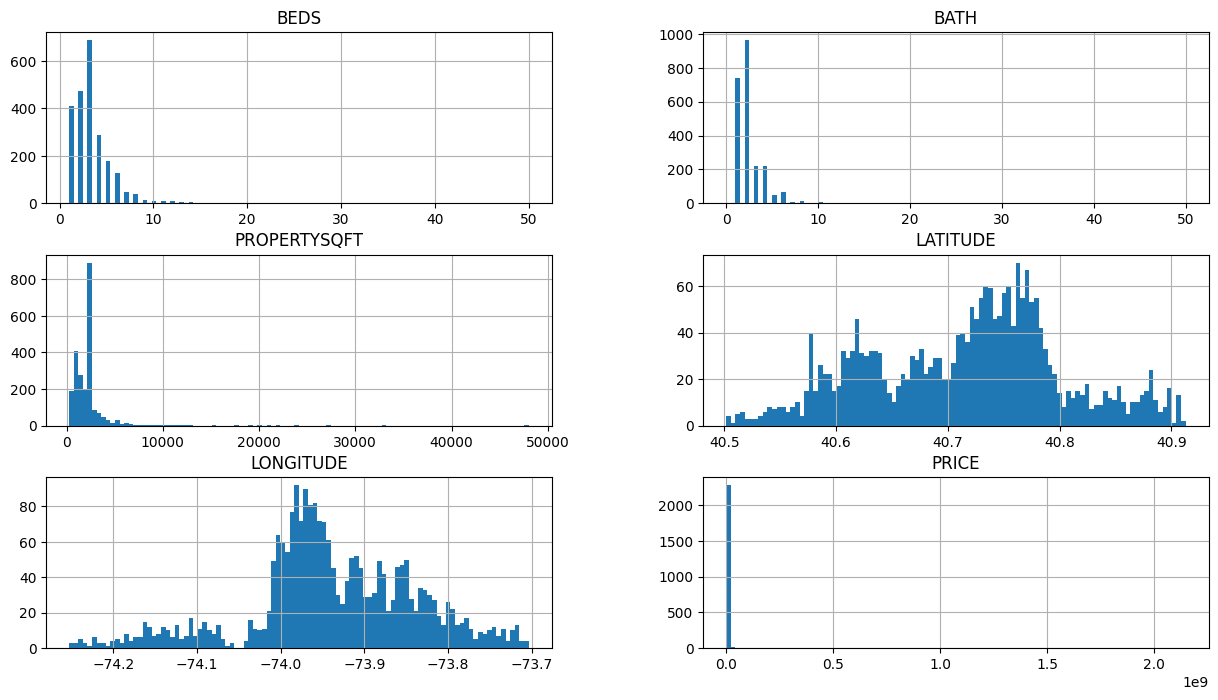

In [285]:
# rozkład zmiennych numerycznych 
df_learning.hist(bins=100, figsize=(15,8))

array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

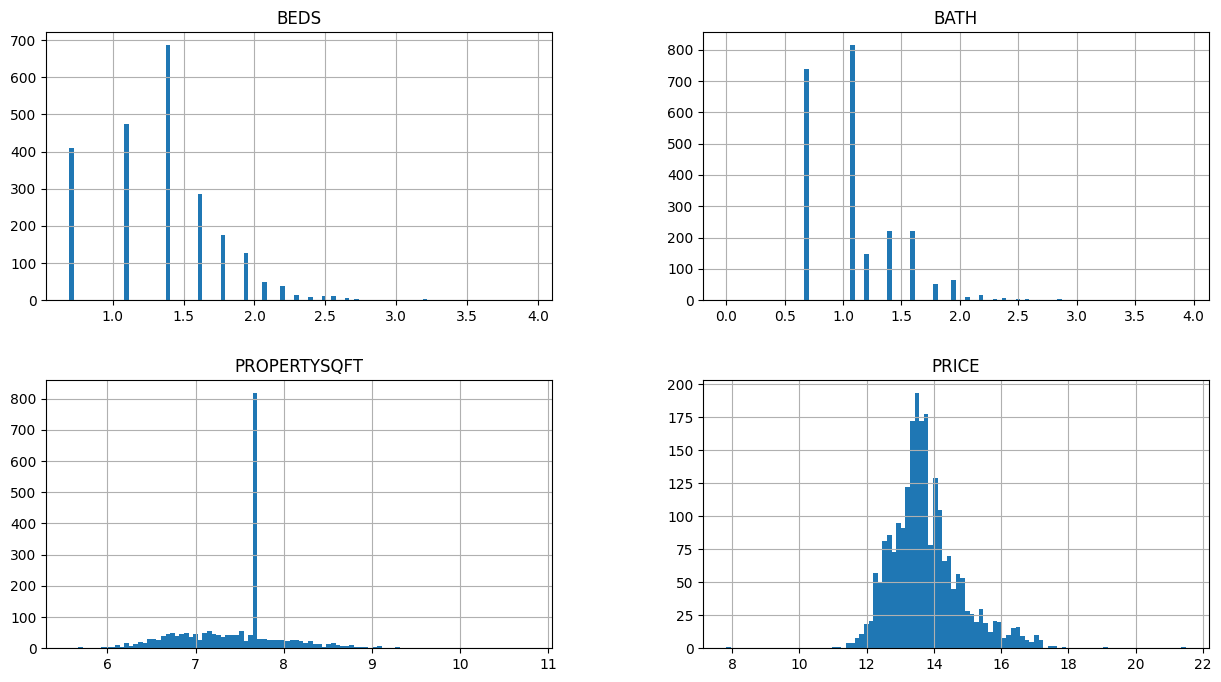

In [286]:
# sprawdzmy rozkłady najważniejszych dla nas zmiennych numerycznych, z przeskalowaniem logarytmicznym (naturalnym zwiększonym o 1)
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

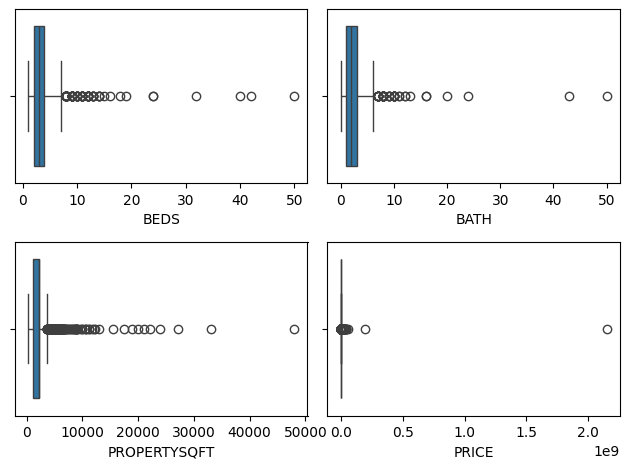

In [287]:
# analiza jako boxploty
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    #sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    sns.boxplot(df_num, x= df_num[col], ax= axes[i])
plt.tight_layout() 
plt.show()

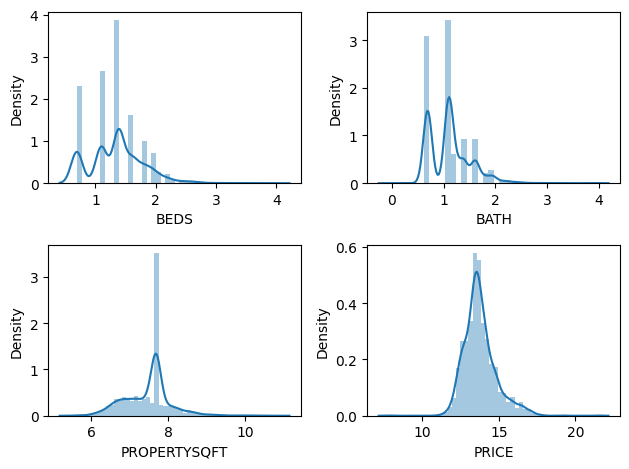

In [288]:
# jako gęstości
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.distplot(np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

In [289]:
# usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 sigm)
print(f'Przed: { df_learning.shape[0]}')
df_learning['Price_log'] = np.log1p(df_learning['PRICE'])
mean_pr = df_learning['Price_log'].mean()
std_pr = df_learning['Price_log'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_learning = df_learning[(df_learning['Price_log'] >= lower) & (df_learning['Price_log'] <= upper)]
print(f'Po: { df_learning.shape[0]}')

Przed: 2308
Po: 2282


In [290]:
#usuwamy outliery ze zmiennych BEDS i BATH
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BEDS'].quantile(0.95)
lower_lim = df_learning['BEDS'].quantile(0.05)
df_learning = df_learning[(df_learning['BEDS'] <= upper_lim) & (df_learning['BEDS'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2282
Wyjściowy rozmiar:  2187


In [291]:
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BATH'].quantile(0.95)
lower_lim = df_learning['BATH'].quantile(0.05)
df_learning = df_learning[(df_learning['BATH'] <= upper_lim) & (df_learning['BATH'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2187
Wyjściowy rozmiar:  2095


In [292]:
print(f'Przed: { df_learning.shape[0]}')

mean_pr = df_learning['PROPERTYSQFT'].mean()
std_pr = df_learning['PROPERTYSQFT'].std()
upper = mean_pr + 2 * std_pr
df_learning = df_learning[(df_learning['PROPERTYSQFT'] <= upper) ]
print(f'Po: { df_learning.shape[0]}') 

Przed: 2095
Po: 2064


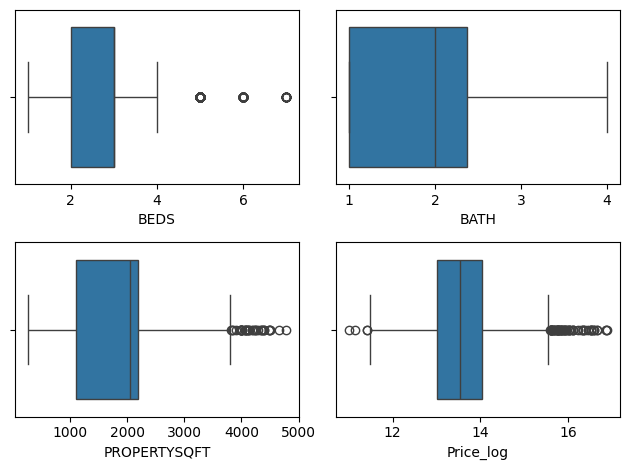

In [293]:
# Dane po usunięciu outlierów
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "Price_log"]]

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= (df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'Price_log'}>]], dtype=object)

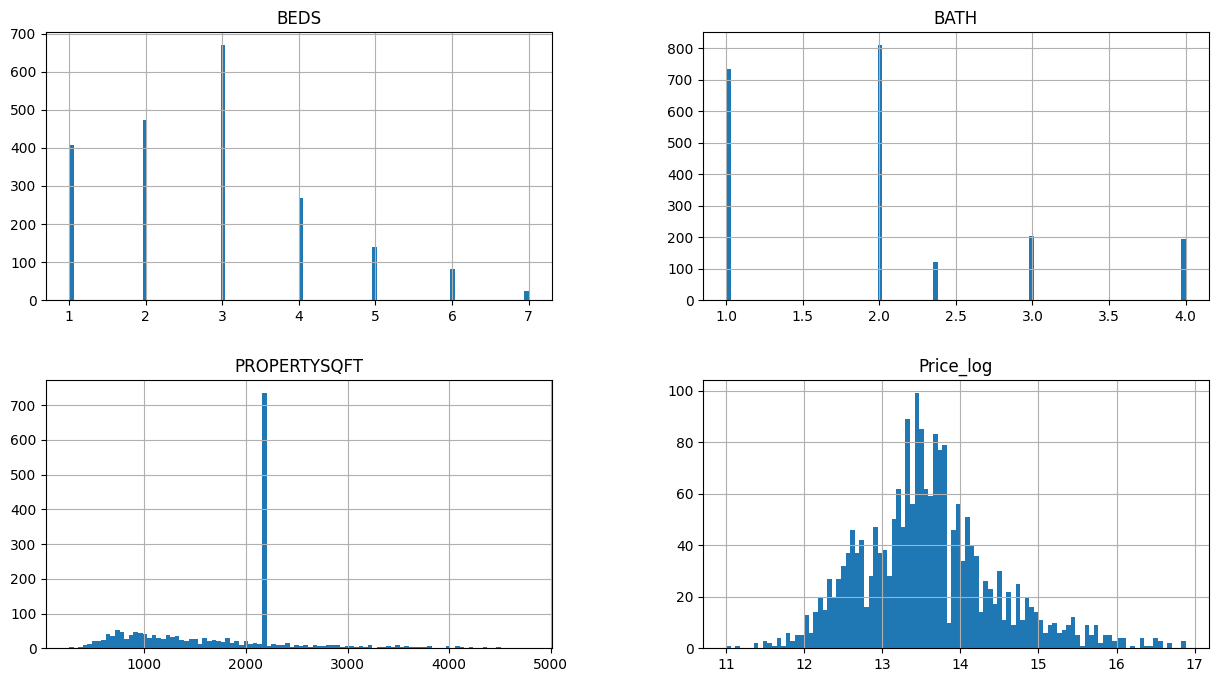

In [294]:
df_num.hist(bins=100, figsize=(15,8))

In [295]:
'''
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log1p(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("PRICE [log1p]")

plt.tight_layout()
plt.show()'''

'\nfig, axes = plt.subplots(1,3, figsize=(12, 4))\naxes = axes.flatten()\n\nfor i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):\n    sns.scatterplot(data=df_num, x= col, y= np.log1p(df_num["PRICE"]), ax= axes[i])\n    axes[i].set_title(col)\n    axes[i].set_ylabel("PRICE [log1p]")\n\nplt.tight_layout()\nplt.show()'

<Axes: >

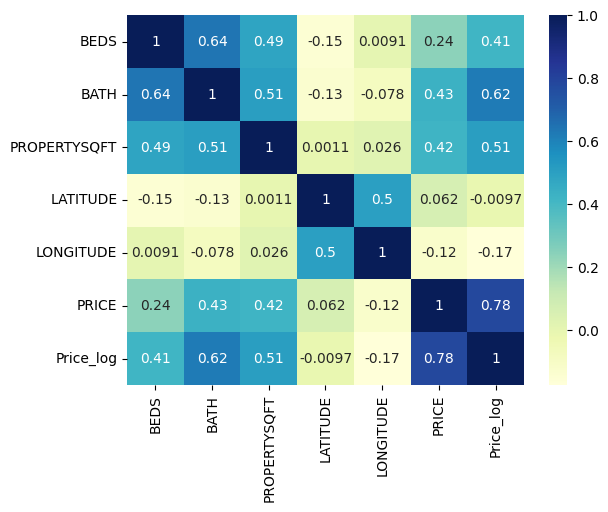

In [296]:
# korelacja danych numerycznych
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

In [297]:
'''
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()'''

'\nfrom mpl_toolkits.basemap import Basemap\n\nplt.figure(figsize=(12, 7))\nm = Basemap(projection=\'merc\', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution=\'h\')\n\nm.drawcoastlines()\nm.drawcountries()\nx, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)\n\nsns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")\n\nplt.legend(title= "PRICE [log1p]")\nplt.show()'

In [298]:
cat_col = [col for col in df_learning.columns if df_learning[col].dtype == 'object']
df_learning[cat_col].nunique()
# widać ze kolumny Address, Main_Address, Long_Name i Formatted_Address mają bardzo dużo unikalnych obserwacji, co przy zmiennych kategorycznych
# moze nie działać najlepiej na model = pomijalne


BROKERTITLE                     669
TYPE                             11
ADDRESS                        2064
STATE                           264
MAIN_ADDRESS                   2064
ADMINISTRATIVE_AREA_LEVEL_2      17
LOCALITY                         10
SUBLOCALITY                      15
STREET_NAME                     136
LONG_NAME                      1522
FORMATTED_ADDRESS              2054
dtype: int64

In [299]:
df_learning = df_learning.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis = 1)

In [300]:
#sprawdzamy rozkład wartości w zmiennych kategorycznych
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                              195
Brokered by Douglas Elliman - 575 Madison Ave     47
Brokered by Brown Harris Stevens                  41
Brokered by Corcoran East Side                    35
Brokered by RE MAX Edge                           35
                                                ... 
Brokered by Broadway Realty                        1
Brokered by Schmidt Realty Inc.                    1
Brokered by GOLDEN REAL CORP.                      1
Brokered by Realty Executives Metro Garden         1
Brokered by NEXT - NextStopNY                      1
Name: BROKERTITLE, Length: 669, dtype: int64

________________________________________________________________
Co-op for sale                681
House for sale                452
Condo for sale                432
Multi-family home for sale    231
Pending                       112
Townhouse for sale             84
Contingent                     42
Land for sale                  19
Foreclosure                     6


In [301]:
# Brokers
sum(df_learning['BROKERTITLE'].value_counts() == 1)
# mamy az 387 brokerów którzy występują raz, zamieńmy je na others

387

In [302]:
df_learning['BROKERTITLE'] = df_learning['BROKERTITLE'].map(lambda x: 'Others' if df_learning['BROKERTITLE'].value_counts()[x] <= 2 else x)
df_learning['BROKERTITLE'].value_counts()

Others                                                  609
Brokered by COMPASS                                     195
Brokered by Douglas Elliman - 575 Madison Ave            47
Brokered by Brown Harris Stevens                         41
Brokered by Corcoran East Side                           35
                                                       ... 
Brokered by Pantiga Group Inc.                            3
Brokered by CENTURY 21 Kafcos Realty                      3
Brokered by Century 21 Amiable Realty Group II, Inc.      3
Brokered by Crifasi Real Estate Inc                       3
Brokered by Homefinders of SI Inc.                        3
Name: BROKERTITLE, Length: 172, dtype: int64

In [303]:
# to samo, ale plus MEAN_PRICE dla kazdej kategorii
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    df_tmp = pd.merge(df_tmp, df_count, on= col).sort_values("MEAN_PRICE", ascending=False).reset_index(drop= True)
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                           BROKERTITLE    MEAN_PRICE  count
0    Brokered by Sotheby's International Realty - E...  5.141842e+06     19
1          Brokered by Garfield, Leslie J. & Co., Inc.  5.080000e+06      3
2                            Brokered by Corcoran SoHo  4.263083e+06     12
3                       Brokered by Corcoran East Side  4.201086e+06     35
4                                  Brokered by Serhant  3.739762e+06     21
..                                                 ...           ...    ...
167                 Brokered by Chous Realty Group Inc  3.087500e+05      4
168              Brokered by Tom Crimmins Realty, Ltd.  2.846333e+05      3
169                     Brokered by Re/Max In The City  2.593125e+05      8
170                     Brokered by RE/MAX City Square  2.399623e+05      3
171                   Brokered by Robert E. Hill, Inc.  1.835030e+05      3

[172 rows x 3 columns]
________________________________________________________________

In [304]:
# Podział zmiennej docelowej ciągłej na kategorie


df_learning['PRICE_Category'] = pd.cut(df_learning['Price_log'], bins=[-float('inf'), 13, 14.5 ,float('inf')], labels=['Cheap', 'Mid', 'Expensive'])
df_learning.head()

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE,PRICE,Price_log,PRICE_Category
254,Others,Condo for sale,2,1.0,850.000000,"Brooklyn, NY 11216",New York,Kings County,Brooklyn,Bedford-Stuyvesant,40.681400,-73.953752,800000,13.592368,Mid
228,Others,Multi-family home for sale,4,4.0,2776.000000,"Staten Island, NY 10312",United States,New York,Richmond County,Staten Island,40.536566,-74.183942,1399999,14.151983,Mid
2202,Brokered by CENTURY 21 Achievers,Multi-family home for sale,5,2.0,2184.207862,"Brooklyn, NY 11226",United States,New York,Kings County,Brooklyn,40.643728,-73.954363,799000,13.591117,Mid
1133,Brokered by Cross Country Realty,Multi-family home for sale,4,3.0,2184.207862,"Brooklyn, NY 11236",United States,New York,Kings County,Brooklyn,40.642651,-73.895898,769000,13.552848,Mid
133,Brokered by COMPASS,Pending,1,1.0,715.000000,"Brooklyn, NY 11249",New York,Kings County,Brooklyn,Williamsburg,40.719753,-73.964264,1099000,13.909912,Mid


In [305]:
# podział na zbiór do nauki i zbiór docelowy
X = df_learning.drop(['PRICE_Category',   'STREET_NAME',  'PRICE', 'Price_log',  'STATE','BROKERTITLE',], axis = 1)
y = df_learning['PRICE_Category']

In [306]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#encoding zmiennych kategorycznych
onehot_encoder = OneHotEncoder()
standard = StandardScaler()

to_scale = [  'PROPERTYSQFT', 'BEDS', 'BATH','LATITUDE', 'LONGITUDE']
to_encode = [	 'TYPE', 	'LOCALITY', 'ADMINISTRATIVE_AREA_LEVEL_2',	'SUBLOCALITY']
column_transformer = ColumnTransformer(
    [('onehot_encoder', onehot_encoder, to_encode),
    ('standard', StandardScaler(), to_scale)],
    remainder='passthrough'  
)
X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state= 42)

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# porównanie kilku modeli i ich skuteczności, ale trzeba pozmieniać bo nie oddaje lekko ponad 60%

In [308]:
model = LogisticRegression()
model.fit(X=X_train, y= y_train)
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
class_report = classification_report(y_test, y_predicted)
print(class_report)

0.8523002421307506
              precision    recall  f1-score   support

       Cheap       0.88      0.74      0.80       103
   Expensive       0.75      0.63      0.68        43
         Mid       0.86      0.93      0.89       267

    accuracy                           0.85       413
   macro avg       0.83      0.77      0.79       413
weighted avg       0.85      0.85      0.85       413



In [309]:
model1 = DecisionTreeClassifier()
model1.fit(X=X_train, y= y_train)
y_predicted1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_predicted1)
display(accuracy1)
class_report1 = classification_report(y_test, y_predicted1)
print(class_report1)

0.8111380145278451

              precision    recall  f1-score   support

       Cheap       0.81      0.75      0.78       103
   Expensive       0.55      0.72      0.63        43
         Mid       0.87      0.85      0.86       267

    accuracy                           0.81       413
   macro avg       0.74      0.77      0.75       413
weighted avg       0.82      0.81      0.81       413



In [310]:
model2 = GradientBoostingClassifier()
model2.fit(X=X_train, y= y_train)
y_predicted2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predicted2)
display(accuracy2)
class_report2 = classification_report(y_test, y_predicted2)
print(class_report2)

0.8983050847457628

              precision    recall  f1-score   support

       Cheap       0.96      0.83      0.89       103
   Expensive       0.77      0.70      0.73        43
         Mid       0.90      0.96      0.93       267

    accuracy                           0.90       413
   macro avg       0.87      0.83      0.85       413
weighted avg       0.90      0.90      0.90       413



In [311]:
model3 = SVC()
model3.fit(X=X_train, y= y_train)
y_predicted3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predicted2)
display(accuracy3)
class_report3 = classification_report(y_test, y_predicted3)
print(class_report3)

0.8983050847457628

              precision    recall  f1-score   support

       Cheap       0.92      0.68      0.78       103
   Expensive       0.74      0.67      0.71        43
         Mid       0.85      0.95      0.90       267

    accuracy                           0.85       413
   macro avg       0.84      0.77      0.80       413
weighted avg       0.86      0.85      0.85       413

